In [ ]:
import pandas as pd

df = pd.read_csv('AAL.csv')

df

,Date,Low,Open,Volume,High,Close,Adjusted Close
0,27-09-2005,19.100000,21.049999,961200,21.400000,19.299999,18.194910
1,28-09-2005,19.200001,19.299999,5747900,20.530001,20.500000,19.326204
2,29-09-2005,20.100000,20.400000,1078200,20.580000,20.209999,19.052805
3,30-09-2005,20.180000,20.260000,3123300,21.049999,21.010000,19.807001
4,03-10-2005,20.900000,20.900000,1057900,21.750000,21.500000,20.268940
...,...,...,...,...,...,...,...
4328,06-12-2022,14.000000,14.140000,20781500,14.340000,14.330000,14.330000
4329,07-12-2022,13.530000,14.240000,28161400,14.240000,13.550000,13.550000
4330,08-12-2022,13.380000,13.650000,25300900,13.800000,13.600000,13.600000
4331,09-12-2022,13.420000,13.520000,18489800,13.660000,13.530000,13.530000


In [ ]:
df = df[['Date', 'Close']]

df

,Date,Close
0,27-09-2005,19.299999
1,28-09-2005,20.500000
2,29-09-2005,20.209999
3,30-09-2005,21.010000
4,03-10-2005,21.500000
...,...,...
4328,06-12-2022,14.330000
4329,07-12-2022,13.550000
4330,08-12-2022,13.600000
4331,09-12-2022,13.530000


In [ ]:
df['Date']

0       27-09-2005
1       28-09-2005
2       29-09-2005
3       30-09-2005
4       03-10-2005
           ...    
4328    06-12-2022
4329    07-12-2022
4330    08-12-2022
4331    09-12-2022
4332    12-12-2022
Name: Date, Length: 4333, dtype: object

In [ ]:
import datetime

def str_to_datetime(s):
  split = s.split('-')
  day, month, year = int(split[0]), int(split[1]), int(split[2])
  return datetime.datetime(year=year, month=month, day=day)

In [ ]:
df

,Date,Close
0,27-09-2005,19.299999
1,28-09-2005,20.500000
2,29-09-2005,20.209999
3,30-09-2005,21.010000
4,03-10-2005,21.500000
...,...,...
4328,06-12-2022,14.330000
4329,07-12-2022,13.550000
4330,08-12-2022,13.600000
4331,09-12-2022,13.530000


In [ ]:
df['Date'] = df['Date'].apply(str_to_datetime)
df['Date']

<ipython-input-48-f6fc52bb0fa5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = df['Date'].apply(str_to_datetime)


0      2005-09-27
1      2005-09-28
2      2005-09-29
3      2005-09-30
4      2005-10-03
          ...    
4328   2022-12-06
4329   2022-12-07
4330   2022-12-08
4331   2022-12-09
4332   2022-12-12
Name: Date, Length: 4333, dtype: datetime64[ns]

In [ ]:
df.index = df.pop('Date')
df

,Close
Date,
2005-09-27,19.299999
2005-09-28,20.500000
2005-09-29,20.209999
2005-09-30,21.010000
2005-10-03,21.500000
...,...
2022-12-06,14.330000
2022-12-07,13.550000
2022-12-08,13.600000


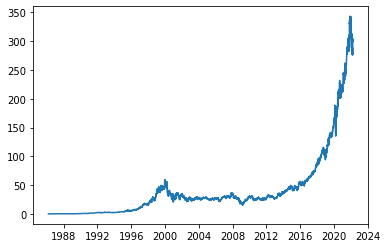

In [ ]:
import matplotlib.pyplot as plt

plt.plot(df.index, df['Close'])

In [ ]:
import numpy as np

def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
  first_date = str_to_datetime(first_date_str)
  last_date  = str_to_datetime(last_date_str)

  target_date = first_date
  
  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)
    
    if len(df_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = df_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))
    
    if last_time:
      break
    
    target_date = next_date

    if target_date == last_date:
      last_time = True
    
  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates
  
  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]
  
  ret_df['Target'] = Y

  return ret_df

# Start day second time around: '2021-03-25'
windowed_df = df_to_windowed_df(df, 
                                '25-03-2021', 
                                '23-03-2022', 
                                n=3)
windowed_df

,Target Date,Target-3,Target-2,Target-1,Target
0,2021-03-25,23.830000,22.270000,21.809999,22.770000
1,2021-03-26,22.270000,21.809999,22.770000,22.930000
2,2021-03-29,21.809999,22.770000,22.930000,22.910000
3,2021-03-30,22.770000,22.930000,22.910000,24.120001
4,2021-03-31,22.930000,22.910000,24.120001,23.900000
...,...,...,...,...,...
247,2022-03-17,14.250000,15.570000,16.469999,16.549999
248,2022-03-18,15.570000,16.469999,16.549999,16.750000
249,2022-03-21,16.469999,16.549999,16.750000,16.090000
250,2022-03-22,16.549999,16.750000,16.090000,16.559999


In [ ]:
def windowed_df_to_date_X_y(windowed_dataframe):
  df_as_np = windowed_dataframe.to_numpy()

  dates = df_as_np[:, 0]

  middle_matrix = df_as_np[:, 1:-1]
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  Y = df_as_np[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((252,), (252, 3, 1), (252,))

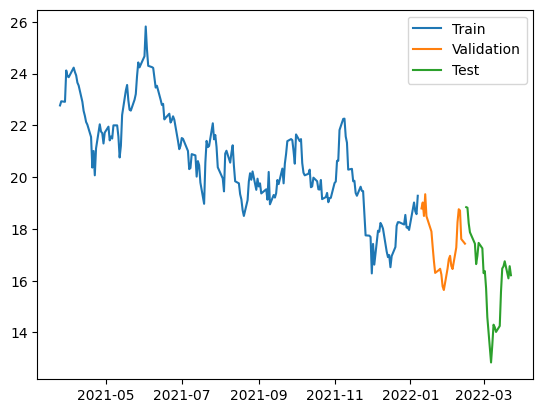

In [ ]:
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

model = Sequential([layers.Input((3, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse', 
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)

Epoch 1/100
7/7 [==============================] - 3s 110ms/step - loss: 427.6460 - mean_absolute_error: 20.5904 - val_loss: 283.9058 - val_mean_absolute_error: 16.8150
Epoch 2/100
7/7 [==============================] - 0s 10ms/step - loss: 400.6115 - mean_absolute_error: 19.9237 - val_loss: 261.7271 - val_mean_absolute_error: 16.1415
Epoch 3/100
7/7 [==============================] - 0s 12ms/step - loss: 372.2509 - mean_absolute_error: 19.1963 - val_loss: 233.2657 - val_mean_absolute_error: 15.2340
Epoch 4/100
7/7 [==============================] - 0s 14ms/step - loss: 334.9508 - mean_absolute_error: 18.1923 - val_loss: 194.3380 - val_mean_absolute_error: 13.8967
Epoch 5/100
7/7 [==============================] - 0s 11ms/step - loss: 281.2317 - mean_absolute_error: 16.6469 - val_loss: 140.7881 - val_mean_absolute_error: 11.8121
Epoch 6/100
7/7 [==============================] - 0s 14ms/step - loss: 209.2630 - mean_absolute_error: 14.2952 - val_loss: 78.8066 - val_mean_absolute_error: 

7/7 [==============================] - 1s 3ms/step


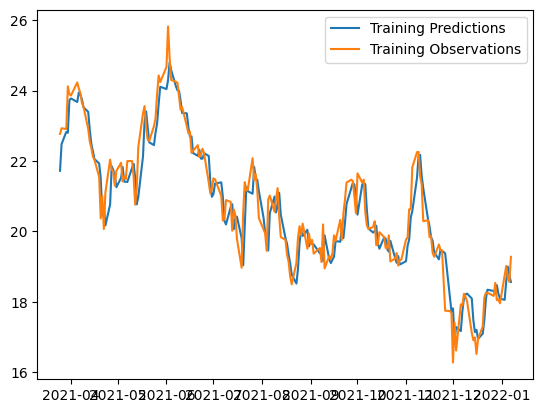

In [ ]:
train_predictions = model.predict(X_train).flatten()

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

1/1 [==============================] - 0s 22ms/step


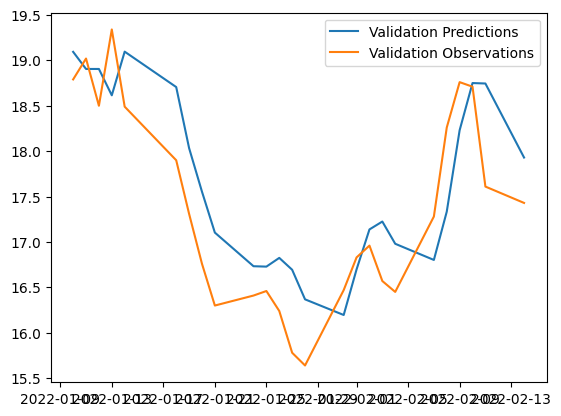

In [ ]:
val_predictions = model.predict(X_val).flatten()

plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

1/1 [==============================] - 0s 27ms/step


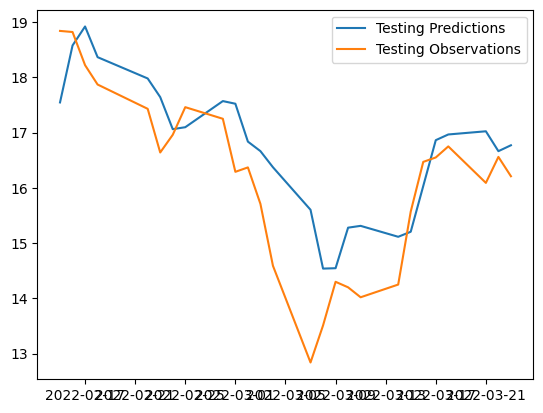

In [ ]:
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

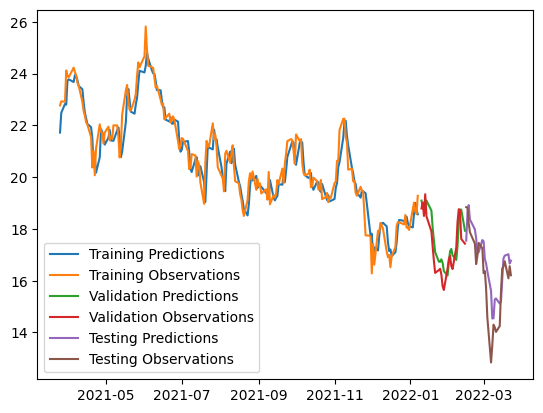

In [ ]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations'])

In [ ]:
from copy import deepcopy

recursive_predictions = []
recursive_dates = np.concatenate([dates_val, dates_test])

for target_date in recursive_dates:
  last_window = deepcopy(X_train[-1])
  next_prediction = model.predict(np.array([last_window])).flatten()
  recursive_predictions.append(next_prediction)
  last_window[-1] = next_prediction

1/1 [==============================] - 0s 26ms/step


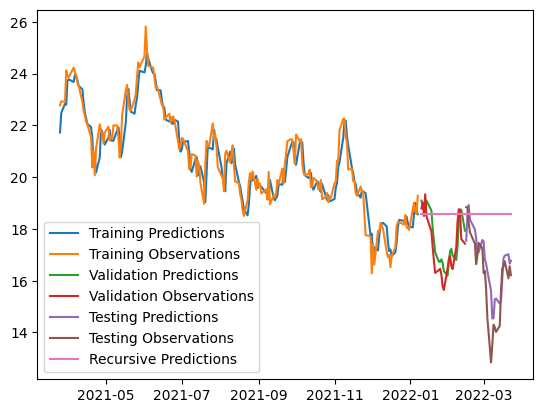

In [ ]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.plot(recursive_dates, recursive_predictions)
plt.legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations',
            'Recursive Predictions'])